In [13]:
%pip install numpy pillow scikit-learn matplotlib tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import random
import matplotlib.pyplot as plt

In [15]:

def load_images_from_directory(directory, target_size=(150, 150)):
    image_list = []
    label_list = []
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            for file in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file)
                img = Image.open(file_path)
                img = img.resize(target_size)
                img = np.array(img)
                image_list.append(img)
                label_list.append(subdir)
    return np.array(image_list), np.array(label_list)


data_directory = r"C:\Users\adity\Downloads\archive\dataset"

img_size = (150, 150)
X, y = load_images_from_directory(data_directory, img_size)
X = X / 255.0


In [16]:

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=10)
y_train = to_categorical(y_train, num_classes=len(label_encoder.classes_))
y_val = to_categorical(y_val, num_classes=len(label_encoder.classes_))
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')


X_train shape: (773, 150, 150, 3)
X_val shape: (194, 150, 150, 3)
y_train shape: (773, 10)
y_val shape: (194, 10)


In [17]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])
model.summary()


c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,038,794 (72.63 MB)

 Trainable params: 19,038,794 (72.63 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [19]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=20,
    validation_data=(X_val, y_val)
)


Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 280ms/step - accuracy: 0.1725 - loss: 2.3811 - val_accuracy: 0.5670 - val_loss: 1.5989
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 284ms/step - accuracy: 0.6239 - loss: 1.1799 - val_accuracy: 0.9175 - val_loss: 0.3886
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 271ms/step - accuracy: 0.9339 - loss: 0.2490 - val_accuracy: 0.9897 - val_loss: 0.0812
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 258ms/step - accuracy: 0.9880 - loss: 0.0554 - val_accuracy: 0.9897 - val_loss: 0.0902
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 275ms/step - accuracy: 0.9825 - loss: 0.0418 - val_accuracy: 0.9897 - val_loss: 0.0736
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 296ms/step - accuracy: 0.9939 - loss: 0.0201 - val_accuracy: 0.9897 - val_loss: 0.0473
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 300ms/step - accuracy: 0.9925 - loss: 0.0265 - val_accuracy: 0.9948 - val_loss: 0.0479
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 290ms/step - accuracy: 0.9844 - loss: 0.0583 - val_accu

In [20]:
model.save('dog_breed_classifier.h5')


In [21]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy: {val_accuracy:.4f}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.9944 - loss: 0.0643 
Validation accuracy: 0.9897


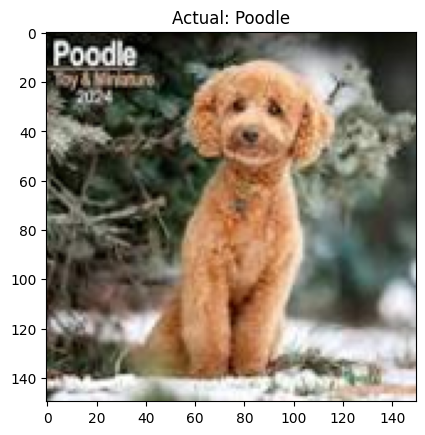

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Prediction probabilities: [[3.8068613e-27 6.2258827e-17 3.1389291e-25 1.8516327e-19 7.2003750e-14
  8.9633870e-18 7.8087408e-24 1.0000000e+00 3.7389707e-21 2.1617381e-22]]
Predicted class: Poodle


In [22]:
def predict_image(model, X, y, label_encoder):
    idx = random.randint(0, len(X) - 1)
    plt.imshow(X[idx])
    plt.title(f'Actual: {label_encoder.inverse_transform([np.argmax(y[idx])])[0]}')
    plt.show()

    y_pred = model.predict(X[idx].reshape(1, 150, 150, 3))
    print(f'Prediction probabilities: {y_pred}')

    predicted_class = label_encoder.inverse_transform([np.argmax(y_pred)])
    print(f'Predicted class: {predicted_class[0]}')
predict_image(model, X_val, y_val, label_encoder)
